# 载入数据

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from copy import deepcopy

import matplotlib.pyplot as plt
import matplotlib

RATIO = 4
DATASET = 'SOUTH_ATLANTIC1'

data = np.load('./data/{}/{}.npz'.format(DATASET, DATASET))
sst_old = data['data']
corordinate = data['corordinate']

COUNT = corordinate.shape[0]
if DATASET[0] == 'G':
    FROM_LON, END_LON, FROM_LAT, END_LAT, SCALE = 0, 360//int(DATASET[-1]), 0, 180//int(DATASET[-1]), RATIO*int(DATASET[-1])
    NEW_LAT = END_LAT - FROM_LAT
    NEW_LON = END_LON - FROM_LON
elif DATASET[0] == 'S':
    FROM_LON_LOAD, END_LON_LOAD, NEW_LON_LOAD, FROM_LAT_LOAD, END_LAT_LOAD, NEW_LAT_LOAD, SCALE_LOAD, RATIO_LOAD = data['info']
    FROM_LON = FROM_LON_LOAD * RATIO_LOAD // SCALE_LOAD
    END_LON = END_LON_LOAD * RATIO_LOAD // SCALE_LOAD
    NEW_LON = NEW_LON_LOAD * RATIO_LOAD // SCALE_LOAD
    FROM_LAT = FROM_LAT_LOAD * RATIO_LOAD // SCALE_LOAD
    END_LAT = END_LAT_LOAD * RATIO_LOAD // SCALE_LOAD
    NEW_LAT = NEW_LAT_LOAD * RATIO_LOAD // SCALE_LOAD
    SCALE = SCALE_LOAD
else:
    FROM_LON, END_LON, FROM_LAT, END_LAT, SCALE = data['info']
    NEW_LAT = END_LAT - FROM_LAT
    NEW_LON = END_LON - FROM_LON



data1 = np.load('./data/{}/best_encoder_{}{}.npz'.format(DATASET, DATASET[0], DATASET[-1]))
encoder_old = data1['adj']

data2 = np.load('./data/{}/best_attention_score_{}{}.npz'.format(DATASET, DATASET[0], DATASET[-1]))
adj_old = data2['adj']

# 处理数据

In [50]:
print(FROM_LAT, END_LAT, NEW_LAT)
print(FROM_LON, END_LON, NEW_LON)
print(SCALE)

print(corordinate.shape, sst_old.shape, encoder_old.shape, adj_old.shape)

sst = np.swapaxes(sst_old, 0, 1)
encoder = np.sum(encoder_old, axis=0)
adj = np.sum(adj_old, axis=0)
print(corordinate.shape, sst.shape, encoder.shape, adj.shape)

print(sst.max(), sst.min())
print(encoder.max(), encoder.min())
print(adj.max(), adj.min())

n_cluster = 5

45 90 45
310 20 70
4
(2711, 2) (7305, 2711) (40, 2711, 16) (40, 2711, 2711)
(2711, 2) (2711, 7305) (2711, 16) (2711, 2711)
31.49999936421712 3.348124921321869
361.02524 -537.2235
0.7131446 1.2325664e-06


# Agglomerative聚类

## 1.sst数据

In [51]:
from sklearn.cluster import AgglomerativeClustering
AggModel_sst = AgglomerativeClustering(n_clusters=n_cluster)
print('------------------------')
print('n_cluster={}:'.format(n_cluster))
AggModel_sst.fit(sst)
label_sst = AggModel_sst.labels_

print(label_sst.shape)

label_sst_new = np.zeros((NEW_LAT,NEW_LON))

for i in range(NEW_LAT):
    for j in range(NEW_LON):
        label_sst_new[i,j] = -1
for i in range(COUNT):
    label_sst_new[int(corordinate[i,1]+0.2),int(corordinate[i,0]+0.2)] = label_sst[i]

------------------------
n_cluster=5:
(2711,)


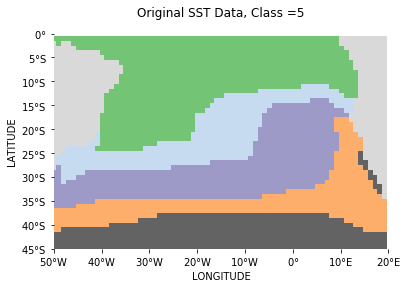

In [52]:
fig_sst = plt.figure(figsize=(6,5))
ax_sst = fig_sst.add_subplot(1,1,1)

ax_sst.matshow(label_sst_new, norm = matplotlib.colors.Normalize(vmin=-1, vmax=n_cluster, clip=False),cmap=plt.cm.tab20c_r)

ax_sst.set_xticks([i - FROM_LON for i in range(FROM_LON, (END_LON+360)+1, 10)])
ax_sst.set_xticklabels([str((i%360) if i %360 < 180 else 360-(i%360))+"$\degree$"+('E' if (i%360)<180 and (i%360)>0 else ('W' if (i%360)>180 else '')) for i in range(FROM_LON*SCALE//RATIO, (END_LON+360)*SCALE//RATIO+1, 10*SCALE//RATIO)])
ax_sst.set_yticks([i - FROM_LAT for i in range(FROM_LAT, END_LAT+1, 5)])
ax_sst.set_yticklabels([str(i-90 if i>90 else 90-i)+"$\degree$"+('N' if i>90 else ('S' if i < 90 else '')) for i in range(FROM_LAT*SCALE//RATIO, END_LAT*SCALE//RATIO+1, 5*SCALE//RATIO)])
ax_sst.xaxis.tick_bottom()

plt.xlim((0, NEW_LON))
plt.ylim((0, NEW_LAT))

ax_sst.spines['right'].set_color('none')
ax_sst.spines['left'].set_color('none')
ax_sst.spines['top'].set_color('none')
ax_sst.spines['bottom'].set_color('none')

ax_sst.set_xlabel("LONGITUDE")
ax_sst.set_ylabel("LATITUDE")
ax_sst.set_title("Original SST Data, Class ="+str(n_cluster))
plt.savefig("pics/{}_agglomerative_sst.pdf".format(DATASET))

## 2.encoder数据

In [53]:
from sklearn.cluster import AgglomerativeClustering
AggModel_encoder = AgglomerativeClustering(n_clusters=n_cluster)
print('------------------------')
print('n_cluster={}:'.format(n_cluster))
AggModel_encoder.fit(encoder)
label_encoder = AggModel_encoder.labels_

print(label_encoder.shape)

label_encoder_new = np.zeros((NEW_LAT,NEW_LON))

for i in range(NEW_LAT):
    for j in range(NEW_LON):
        label_encoder_new[i,j] = -1
for i in range(COUNT):
    label_encoder_new[int(corordinate[i,1]+0.2),int(corordinate[i,0]+0.2)] = label_encoder[i]

------------------------
n_cluster=5:
(2711,)


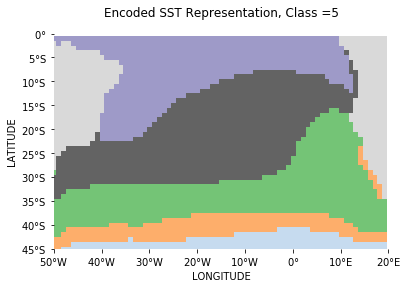

In [54]:
fig_encoder = plt.figure(figsize=(6,5))
ax_encoder = fig_encoder.add_subplot(1,1,1)

ax_encoder.matshow(label_encoder_new, norm = matplotlib.colors.Normalize(vmin=-1, vmax=n_cluster, clip=False),cmap=plt.cm.tab20c_r)

ax_encoder.set_xticks([i - FROM_LON for i in range(FROM_LON, (END_LON+360)+1, 10)])
ax_encoder.set_xticklabels([str((i%360) if i %360 < 180 else 360-(i%360))+"$\degree$"+('E' if (i%360)<180 and (i%360)>0 else ('W' if (i%360)>180 else '')) for i in range(FROM_LON*SCALE//RATIO, (END_LON+360)*SCALE//RATIO+1, 10*SCALE//RATIO)])
ax_encoder.set_yticks([i - FROM_LAT for i in range(FROM_LAT, END_LAT+1, 5)])
ax_encoder.set_yticklabels([str(i-90 if i>90 else 90-i)+"$\degree$"+('N' if i>90 else ('S' if i < 90 else '')) for i in range(FROM_LAT*SCALE//RATIO, END_LAT*SCALE//RATIO+1, 5*SCALE//RATIO)])
ax_encoder.xaxis.tick_bottom()

plt.xlim((0, NEW_LON))
plt.ylim((0, NEW_LAT))

ax_encoder.spines['right'].set_color('none')
ax_encoder.spines['left'].set_color('none')
ax_encoder.spines['top'].set_color('none')
ax_encoder.spines['bottom'].set_color('none')

ax_encoder.set_xlabel("LONGITUDE")
ax_encoder.set_ylabel("LATITUDE")
ax_encoder.set_title("Encoded SST Representation, Class ="+str(n_cluster))
plt.savefig("pics/{}_agglomerative_encoder.pdf".format(DATASET))

## 3.attention数据

In [55]:
from sklearn.cluster import AgglomerativeClustering
AggModel_attention = AgglomerativeClustering(n_clusters=n_cluster)
print('------------------------')
print('n_cluster={}:'.format(n_cluster))
AggModel_attention.fit(adj)
label_attention = AggModel_attention.labels_

print(label_attention.shape)

label_attention_new = np.zeros((NEW_LAT,NEW_LON))

for i in range(NEW_LAT):
    for j in range(NEW_LON):
        label_attention_new[i,j] = -1
for i in range(COUNT):
    label_attention_new[int(corordinate[i,1]+0.2),int(corordinate[i,0]+0.2)] = label_attention[i]

np.savez('./data/{}/{}_CLASSINFO.npz'.format(DATASET, DATASET), classinfo = label_attention)

------------------------
n_cluster=5:
(2711,)


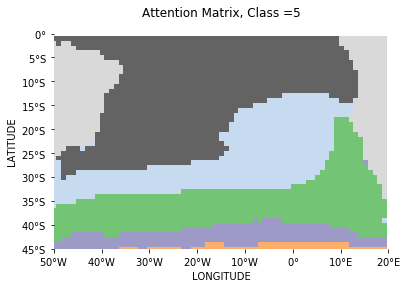

In [56]:
fig_attention = plt.figure(figsize=(6,5))
ax_attention = fig_attention.add_subplot(1,1,1)

ax_attention.matshow(label_attention_new, norm = matplotlib.colors.Normalize(vmin=-1, vmax=n_cluster, clip=False),cmap=plt.cm.tab20c_r)

ax_attention.set_xticks([i - FROM_LON for i in range(FROM_LON, (END_LON+360)+1, 10)])
ax_attention.set_xticklabels([str((i%360) if i %360 < 180 else 360-(i%360))+"$\degree$"+('E' if (i%360)<180 and (i%360)>0 else ('W' if (i%360)>180 else '')) for i in range(FROM_LON*SCALE//RATIO, (END_LON+360)*SCALE//RATIO+1, 10*SCALE//RATIO)])
ax_attention.set_yticks([i - FROM_LAT for i in range(FROM_LAT, END_LAT+1, 5)])
ax_attention.set_yticklabels([str(i-90 if i>90 else 90-i)+"$\degree$"+('N' if i>90 else ('S' if i < 90 else '')) for i in range(FROM_LAT*SCALE//RATIO, END_LAT*SCALE//RATIO+1, 5*SCALE//RATIO)])
ax_attention.xaxis.tick_bottom()

plt.xlim((0, NEW_LON))
plt.ylim((0, NEW_LAT))

ax_attention.spines['right'].set_color('none')
ax_attention.spines['left'].set_color('none')
ax_attention.spines['top'].set_color('none')
ax_attention.spines['bottom'].set_color('none')

ax_attention.set_xlabel("LONGITUDE")
ax_attention.set_ylabel("LATITUDE")
ax_attention.set_title("Attention Matrix, Class ="+str(n_cluster))
plt.savefig("pics/{}_agglomerative_attention.pdf".format(DATASET))